In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt

In [2]:
filepath = "D:/trafego_marco.csv"
names = ['data','valor']
thp = pd.read_csv(filepath, names=names)
print("THP data:\n{}".format(thp.head()))

THP data:
         data     valor
0  03/10/2014  20535108
1  03/11/2014  71873931
2  03/12/2014  77032930
3  03/13/2014  75336770
4  03/14/2014  71143136


Text(0,0.5,'valor')

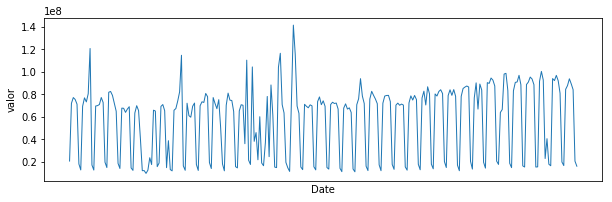

In [3]:
plt.figure(figsize=(10, 3))
thp['data'] = pd.to_datetime(thp['data'])
xticks = pd.date_range(start=thp['data'].min(), end=thp['data'].max())
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(thp['valor'], linewidth=1)
plt.xlabel('Date')
plt.ylabel('valor')

In [4]:
# extrair os dados de trafego
y = thp['valor']
# extrair dados de dia
X = pd.DataFrame(np.array(thp['data']).reshape(-1,1))
print(X)

             0
0   2014-03-10
1   2014-03-11
2   2014-03-12
3   2014-03-13
4   2014-03-14
5   2014-03-15
6   2014-03-16
7   2014-03-17
8   2014-03-18
9   2014-03-19
10  2014-03-20
11  2014-03-21
12  2014-03-22
13  2014-03-23
14  2014-03-24
15  2014-03-25
16  2014-03-26
17  2014-03-27
18  2014-03-28
19  2014-03-29
20  2014-03-30
21  2014-03-31
22  2014-04-01
23  2014-04-02
24  2014-04-03
25  2014-04-04
26  2014-04-05
27  2014-04-06
28  2014-04-07
29  2014-04-08
..         ...
243 2014-11-08
244 2014-11-09
245 2014-11-10
246 2014-11-11
247 2014-11-12
248 2014-11-13
249 2014-11-14
250 2014-11-15
251 2014-11-16
252 2014-11-17
253 2014-11-18
254 2014-11-19
255 2014-11-20
256 2014-11-21
257 2014-11-22
258 2014-11-23
259 2014-11-24
260 2014-11-25
261 2014-11-26
262 2014-11-27
263 2014-11-28
264 2014-11-29
265 2014-11-30
266 2014-12-01
267 2014-12-02
268 2014-12-03
269 2014-12-04
270 2014-12-05
271 2014-12-06
272 2014-12-07

[273 rows x 1 columns]


In [5]:
# usando 218 amostrar para o treino (80% do dataset)
n_train = 218

In [6]:
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Trafego")

Test-set R^2: -0.09


<Figure size 432x288 with 0 Axes>

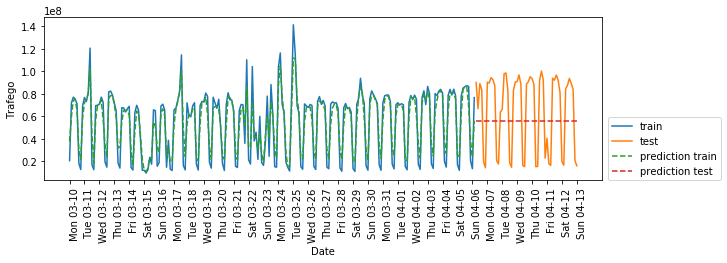

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [8]:
#hours = thp['data'].dt.hour
days = thp['data'].dt.dayofyear
week_day = thp['data'].dt.weekday

In [9]:
d = {'day': days, 'wday': week_day }
new_x = pd.DataFrame(data=d)
print(new_x)

     day  wday
0     69     0
1     70     1
2     71     2
3     72     3
4     73     4
5     74     5
6     75     6
7     76     0
8     77     1
9     78     2
10    79     3
11    80     4
12    81     5
13    82     6
14    83     0
15    84     1
16    85     2
17    86     3
18    87     4
19    88     5
20    89     6
21    90     0
22    91     1
23    92     2
24    93     3
25    94     4
26    95     5
27    96     6
28    97     0
29    98     1
..   ...   ...
243  312     5
244  313     6
245  314     0
246  315     1
247  316     2
248  317     3
249  318     4
250  319     5
251  320     6
252  321     0
253  322     1
254  323     2
255  324     3
256  325     4
257  326     5
258  327     6
259  328     0
260  329     1
261  330     2
262  331     3
263  332     4
264  333     5
265  334     6
266  335     0
267  336     1
268  337     2
269  338     3
270  339     4
271  340     5
272  341     6

[273 rows x 2 columns]


Test-set R^2: 0.85


<Figure size 432x288 with 0 Axes>

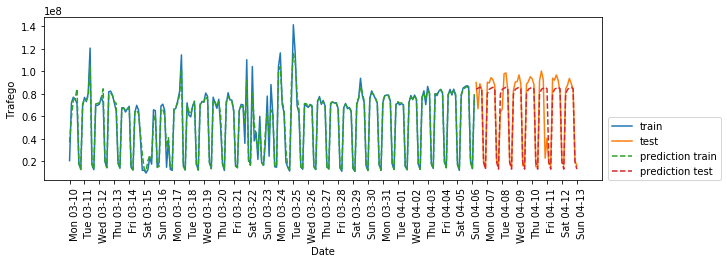

In [10]:
plt.figure()
eval_on_features(new_x, y, regressor)

In [11]:
week_day_rad = week_day * 2 * np.pi / 7
print(week_day_rad)

0      0.000000
1      0.897598
2      1.795196
3      2.692794
4      3.590392
5      4.487990
6      5.385587
7      0.000000
8      0.897598
9      1.795196
10     2.692794
11     3.590392
12     4.487990
13     5.385587
14     0.000000
15     0.897598
16     1.795196
17     2.692794
18     3.590392
19     4.487990
20     5.385587
21     0.000000
22     0.897598
23     1.795196
24     2.692794
25     3.590392
26     4.487990
27     5.385587
28     0.000000
29     0.897598
         ...   
243    4.487990
244    5.385587
245    0.000000
246    0.897598
247    1.795196
248    2.692794
249    3.590392
250    4.487990
251    5.385587
252    0.000000
253    0.897598
254    1.795196
255    2.692794
256    3.590392
257    4.487990
258    5.385587
259    0.000000
260    0.897598
261    1.795196
262    2.692794
263    3.590392
264    4.487990
265    5.385587
266    0.000000
267    0.897598
268    1.795196
269    2.692794
270    3.590392
271    4.487990
272    5.385587
Name: data, Length: 273,

In [12]:
week_day_sin = np.sin(week_day_rad)
week_day_cos = np.cos(week_day_rad)

In [13]:
d2 = {'mday':days, 'wday_sen': week_day_sin, 'wday_cos': week_day_cos }
new_x2 = pd.DataFrame(data=d2)
print(new_x2)

     mday  wday_sen  wday_cos
0      69  0.000000  1.000000
1      70  0.781831  0.623490
2      71  0.974928 -0.222521
3      72  0.433884 -0.900969
4      73 -0.433884 -0.900969
5      74 -0.974928 -0.222521
6      75 -0.781831  0.623490
7      76  0.000000  1.000000
8      77  0.781831  0.623490
9      78  0.974928 -0.222521
10     79  0.433884 -0.900969
11     80 -0.433884 -0.900969
12     81 -0.974928 -0.222521
13     82 -0.781831  0.623490
14     83  0.000000  1.000000
15     84  0.781831  0.623490
16     85  0.974928 -0.222521
17     86  0.433884 -0.900969
18     87 -0.433884 -0.900969
19     88 -0.974928 -0.222521
20     89 -0.781831  0.623490
21     90  0.000000  1.000000
22     91  0.781831  0.623490
23     92  0.974928 -0.222521
24     93  0.433884 -0.900969
25     94 -0.433884 -0.900969
26     95 -0.974928 -0.222521
27     96 -0.781831  0.623490
28     97  0.000000  1.000000
29     98  0.781831  0.623490
..    ...       ...       ...
243   312 -0.974928 -0.222521
244   313 

Test-set R^2: 0.85


<Figure size 432x288 with 0 Axes>

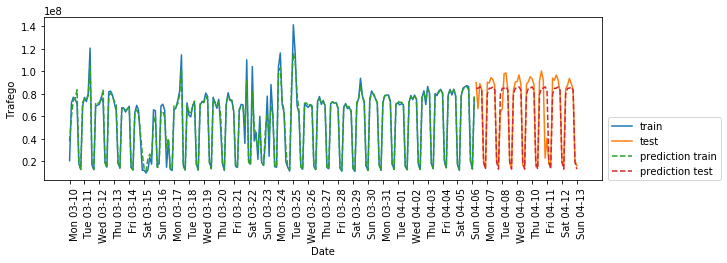

In [14]:
plt.figure()
eval_on_features(new_x2, y, regressor)